In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [33]:
cancer = load_breast_cancer()
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=0)

In [34]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [35]:
print('trian : {0:.3f} , test : {1:.3f}'.format(tree.score(x_train, y_train) , tree.score(x_test,y_test)))

trian : 1.000 , test : 0.902


In [36]:
from sklearn.tree import export_graphviz

In [37]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [38]:
export_graphviz(tree, out_file='tree.dat', class_names=['malignat','benign'], 
                feature_names=cancer.feature_names, impurity=False, filled=True)

In [39]:
import graphviz

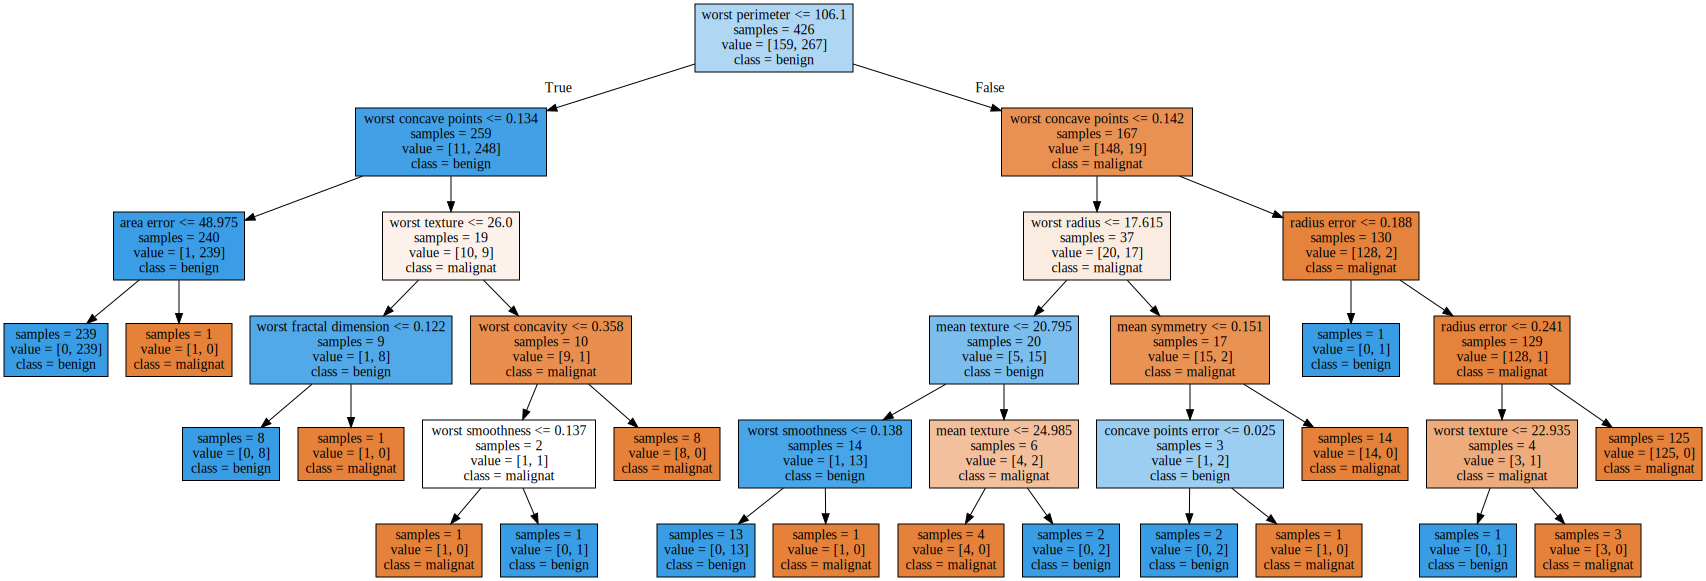

In [40]:
with open('tree.dat') as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

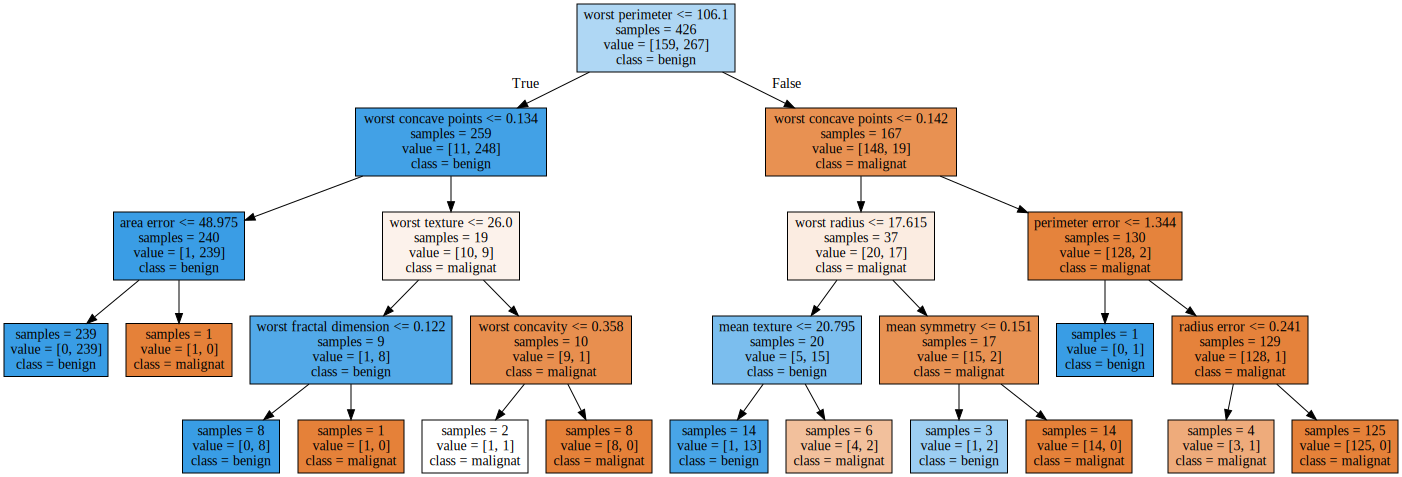

In [41]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(x_train, y_train)
export_graphviz(tree, out_file='tree.dat', class_names=['malignat','benign'], 
                feature_names=cancer.feature_names, impurity=False, filled=True)

with open('tree.dat') as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

In [42]:
tree.feature_importances_

array([0.        , 0.01558601, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.01150064, 0.        ,
       0.00253726, 0.        , 0.01023272, 0.01043016, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03848579, 0.03087626, 0.75708572, 0.        , 0.        ,
       0.        , 0.00418952, 0.10976588, 0.        , 0.00931004])

In [43]:
cancer.data.shape

(569, 30)

In [44]:
import matplotlib.pyplot as plt
import numpy as np

In [51]:
def plot_feature_importance(model, data_name):
    n_features = data_name.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), data_name.feature_names)
    plt.xlabel('feature_importances')
    plt.ylabel('features')
    plt.ylim(-1, n_features)

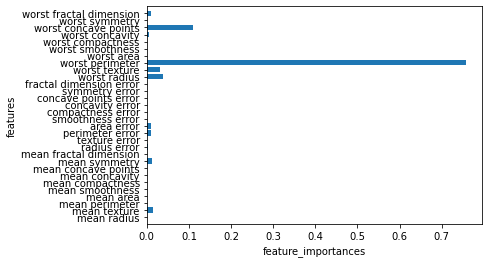

In [46]:
plot_feature_importance(tree, cancer);

In [47]:
from sklearn.datasets import load_boston
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [48]:
boston = load_boston()
x_train, x_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)

In [53]:
tree = DecisionTreeRegressor().fit(x_train, y_train)
lr = LinearRegression().fit(x_train, y_train)

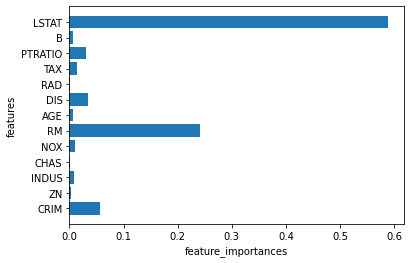

In [52]:
plot_feature_importance(tree, boston)

In [54]:
print('tree : {0:.3f} , {1:.3f}'.format(tree.score(x_train, y_train) , tree.score(x_test,y_test)))
print('lr : {0:.3f} , {1:.3f}'.format(lr.score(x_train, y_train) , lr.score(x_test,y_test)))

tree : 1.000 , 0.670
lr : 0.770 , 0.635


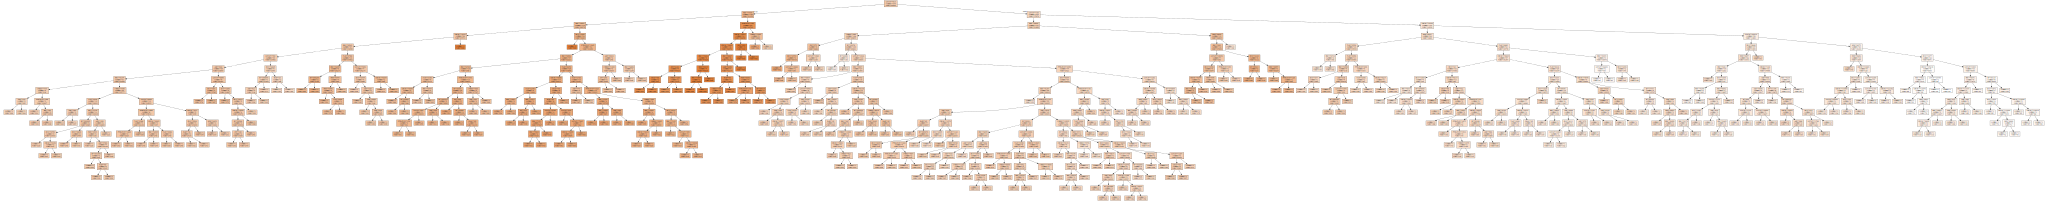

In [59]:
export_graphviz(tree, out_file='tree2.dat', 
                feature_names=boston.feature_names, impurity=False, filled=True)

with open('tree2.dat') as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

### 결정 트리의 앙상블

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [68]:
print('forest : {0:.3f} , {1:.3f}'.format(forest.score(x_train, y_train) , forest.score(x_test,y_test)))

forest : 1.000 , 0.972


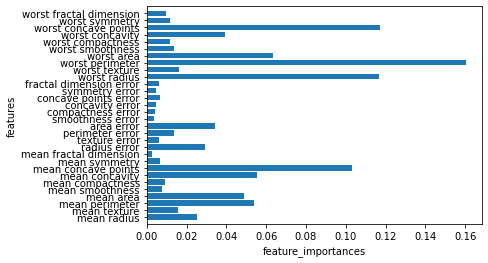

In [69]:
plot_feature_importance(forest, cancer)

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier

In [85]:
bagging = BaggingClassifier(LogisticRegression(), n_estimators=100, oob_score=True, n_jobs=-1, random_state=42)
bagging.fit(x_train, y_train)
print('bagging : {0:.3f} , {1:.3f}'.format(bagging.score(x_train, y_train) , bagging.score(x_test,y_test)))

bagging : 0.955 , 0.937


In [86]:
bagging = BaggingClassifier(DecisionTreeClassifier(), n_estimators=100, oob_score=True, n_jobs=-1, random_state=42)
bagging.fit(x_train, y_train)
print('bagging : {0:.3f} , {1:.3f}'.format(bagging.score(x_train, y_train) , bagging.score(x_test,y_test)))

bagging : 1.000 , 0.965


In [87]:
from sklearn.ensemble import ExtraTreesClassifier
xtree = ExtraTreesClassifier(n_estimators=5, n_jobs=-1, random_state=0)
xtree.fit(x_train, y_train)
print('xtree : {0:.3f} , {1:.3f}'.format(xtree.score(x_train, y_train) , xtree.score(x_test,y_test)))

xtree : 1.000 , 0.972


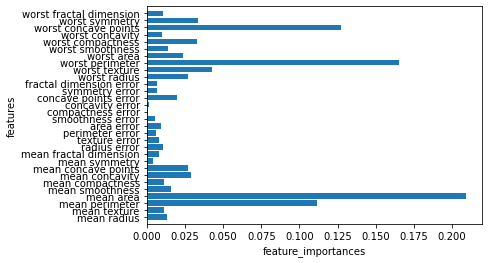

In [88]:
plot_feature_importance(xtree, cancer)

In [95]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=100, random_state=0)
ada.fit(x_train, y_train)
print('ada : {0:.3f} , {1:.3f}'.format(ada.score(x_train, y_train) , ada.score(x_test,y_test)))

ada : 1.000 , 0.986


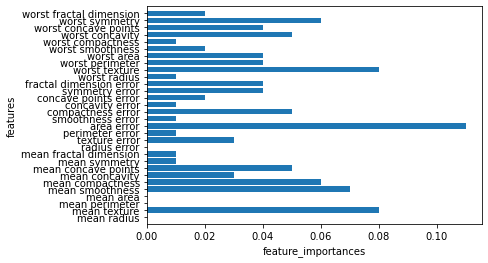

In [96]:
plot_feature_importance(ada, cancer)